CREATING AN INTERACTIVE STOCK PRICE GRAPH FOR STOCKS LISTED IN BSE:
* WE WILL USE BOTH THE PLOTLY AND MATPLOTLIB AS AN INBUILT PYTHON LIBRARY TO OBTAIN BOTH TYPES OF GRAPH

In [2]:
import yfinance as yf
import pandas as pd
import plotly.graph_objs as go
import plotly.offline as pyo

stocklist = ['SBIN.BO', 'INFY.BO', 'RELIANCE.BO', 'TCS.BO']  # Replace with your desired Indian stock symbols
# Create an empty DataFrame to store the concatenated data
concatenated_df = pd.DataFrame()

for stock in stocklist:
    # Retrieve data for each stock
    stock_data = yf.download(stock, start='2000-01-01', end='2023-12-31')  # Adjust start and end dates as needed
    if stock_data is not None:
        stock_data['Symbol'] = stock
    # Append the data for each stock to the concatenated DataFrame
    concatenated_df = pd.concat([concatenated_df, stock_data])

# Reset index for concatenated DataFrame
concatenated_df.reset_index(inplace=True)
#concatenated_df = 
fig = go.Figure()
for stock in stocklist:
    if not concatenated_df.empty:
        stock_data = concatenated_df[concatenated_df['Close'].notnull() & (concatenated_df['Symbol'] == stock)]
        ## we cannot use concatenated_df[ concatenated_df.index.get_values(1) == stock] as we have to deal with single level indexing.
        if not stock_data.empty:  # Check if stock_data is not empty
            fig.add_trace(go.Scatter(x=stock_data['Date'],
                                     y=stock_data['Close'],
                                     mode='lines',
                                     name=stock))

# Plotting
pyo.init_notebook_mode(connected=True)
pd.options.plotting.backend = 'plotly'
fig.update_layout(title='Indian Stock Closing Prices',
                  xaxis_title='Date',
                  yaxis_title='Closing Price')
fig.show()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


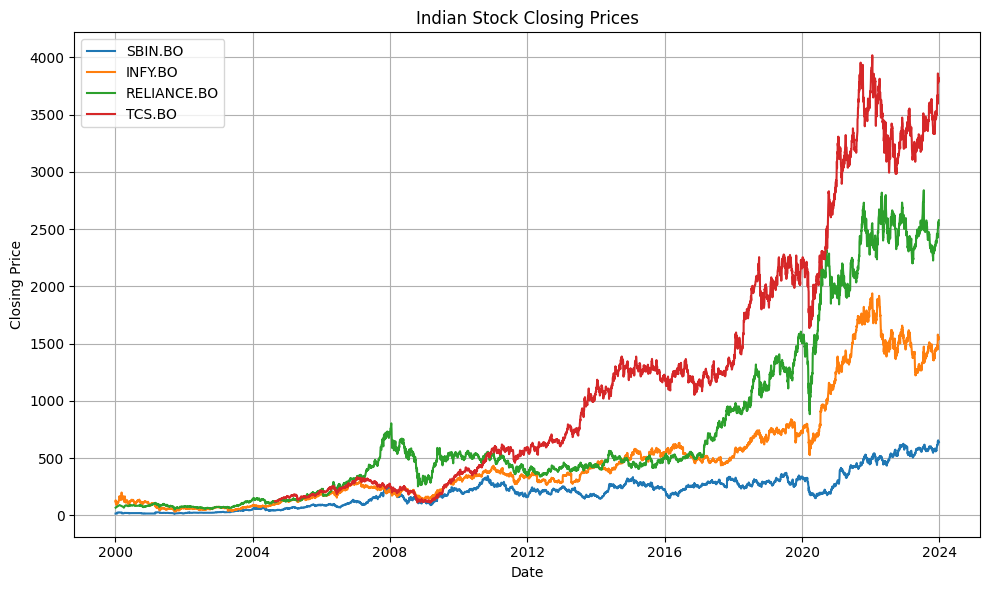

In [3]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

stocklist = ['SBIN.BO', 'INFY.BO', 'RELIANCE.BO', 'TCS.BO']  # Replace with your desired Indian stock symbols
# Create an empty DataFrame to store the concatenated data
concatenated_df = pd.DataFrame()

for stock in stocklist:
    # Retrieve data for each stock
    stock_data = yf.download(stock, start='2000-01-01', end='2023-12-31')  # Adjust start and end dates as needed
    if stock_data is not None:
        stock_data['Symbol'] = stock
        # Append the data for each stock to the concatenated DataFrame
        concatenated_df = pd.concat([concatenated_df, stock_data])

# Reset index for concatenated DataFrame
concatenated_df.reset_index(inplace=True)

plt.figure(figsize=(10, 6))

for stock in stocklist:
    if not concatenated_df.empty:
        stock_data = concatenated_df[concatenated_df['Close'].notnull() & (concatenated_df['Symbol'] == stock)]
        if not stock_data.empty:  # Check if stock_data is not empty
            plt.plot(stock_data['Date'], stock_data['Close'], label=stock)

plt.title('Indian Stock Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
